In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# 1. Membaca dataset
df = pd.read_csv(r'C:\Users\OPTION\Downloads\Python DA\[Belum Upload]Projects 28_E-Commerce Clothings Sales Reviews Analysis​\Womens Clothing E-Commerce Reviews.csv')
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0.0,767.0,33.0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,1.0,0.0,Initmates,Intimate,Intimates
1,1.0,1080.0,34.0,NaN,Love this dress! it's sooo pretty. i happene...,5.0,1.0,4.0,General,Dresses,Dresses
2,2.0,1077.0,60.0,Some major design flaws,I had such high hopes for this dress and reall...,3.0,0.0,0.0,General,Dresses,Dresses
3,3.0,1049.0,50.0,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,1.0,0.0,General Petite,Bottoms,Pants
4,4.0,847.0,47.0,Flattering shirt,This shirt is very flattering to all due to th...,5.0,1.0,6.0,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481.0,1104.0,34.0,Great dress for many occasions,I was very happy to snag this dress at such a ...,5.0,1.0,0.0,General Petite,Dresses,Dresses
23482,23482.0,862.0,48.0,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3.0,1.0,0.0,General Petite,Tops,Knits
23483,23483.0,1104.0,31.0,"Cute, but see through","This fit well, but the top was very see throug...",3.0,0.0,1.0,General Petite,Dresses,Dresses
23484,23484.0,1084.0,28.0,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3.0,1.0,2.0,General,Dresses,Dresses


In [23]:
# Menampilkan informasi dasar
print("Dimensi awal dataset:", df.shape)

Dimensi awal dataset: (23486, 11)


In [24]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               23472 non-null  float64
 1   Clothing ID              23472 non-null  float64
 2   Age                      23471 non-null  float64
 3   Title                    19663 non-null  object 
 4   Review Text              22628 non-null  object 
 5   Rating                   23471 non-null  float64
 6   Recommended IND          23471 non-null  float64
 7   Positive Feedback Count  23471 non-null  float64
 8   Division Name            23471 non-null  object 
 9   Department Name          23471 non-null  object 
 10  Class Name               23471 non-null  object 
dtypes: float64(6), object(5)
memory usage: 2.0+ MB


,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23472.000000,23472.000000,23471.000000,23471.000000,23471.000000,23471.000000
mean,11738.965491,918.486665,43.201270,4.195560,0.822249,2.537259
std,6779.729976,202.727678,12.280872,1.110211,0.382311,5.703695
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5867.750000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11736.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17610.250000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [25]:
# --- Mendeteksi Data Duplikat dan Missing Values ---
duplikat_count = df.duplicated().sum()
print("Jumlah data duplikat:", duplikat_count)

Jumlah data duplikat: 13


In [26]:
missing_values = df.isnull().sum()
print("Missing values per kolom:\n", missing_values)

# --- Mendeteksi dan Menghapus Outlier ---
# Fungsi untuk menghapus outlier menggunakan metode IQR
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

Missing values per kolom:
 Unnamed: 0                   14
Clothing ID                  14
Age                          15
Title                      3823
Review Text                 858
Rating                       15
Recommended IND              15
Positive Feedback Count      15
Division Name                15
Department Name              15
Class Name                   15
dtype: int64


In [27]:
# Salin dataframe untuk cleaning
df_clean = df.copy()

In [28]:
# Kolom numerik yang akan dicek outlier-nya
numeric_cols = ['Age', 'Rating', 'Positive Feedback Count']

for col in numeric_cols:
    df_clean = remove_outliers(df_clean, col)

In [29]:
# Hapus data duplikat dan baris yang memiliki missing values
df_clean = df_clean.drop_duplicates().dropna()

print("Shape dataset setelah cleaning:", df_clean.shape)

Shape dataset setelah cleaning: (15254, 11)


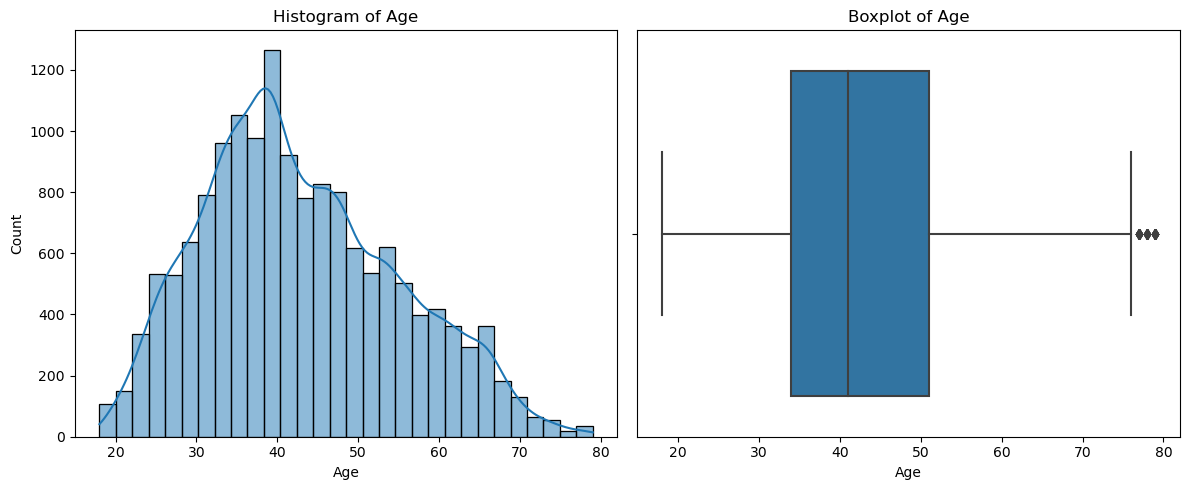

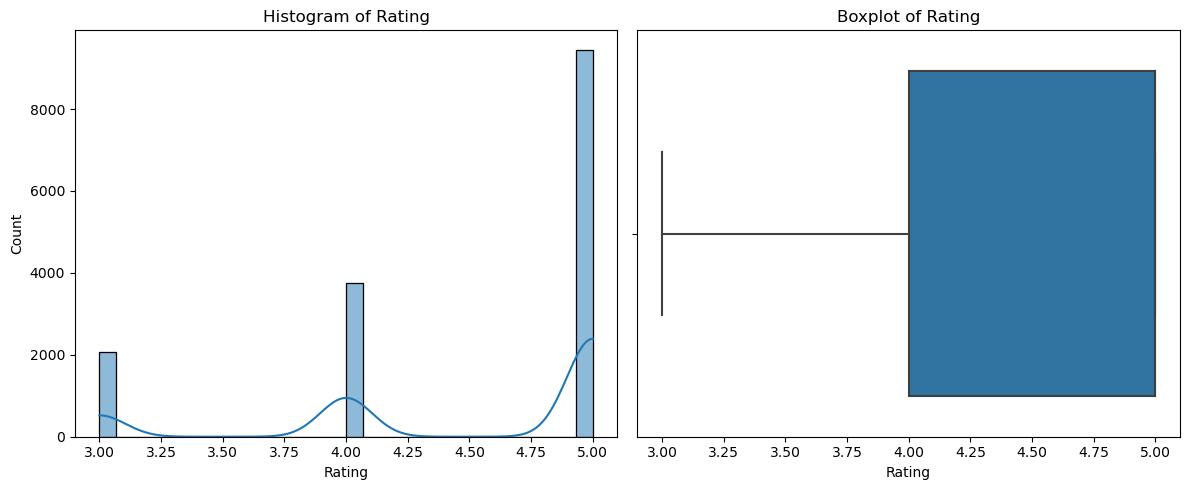

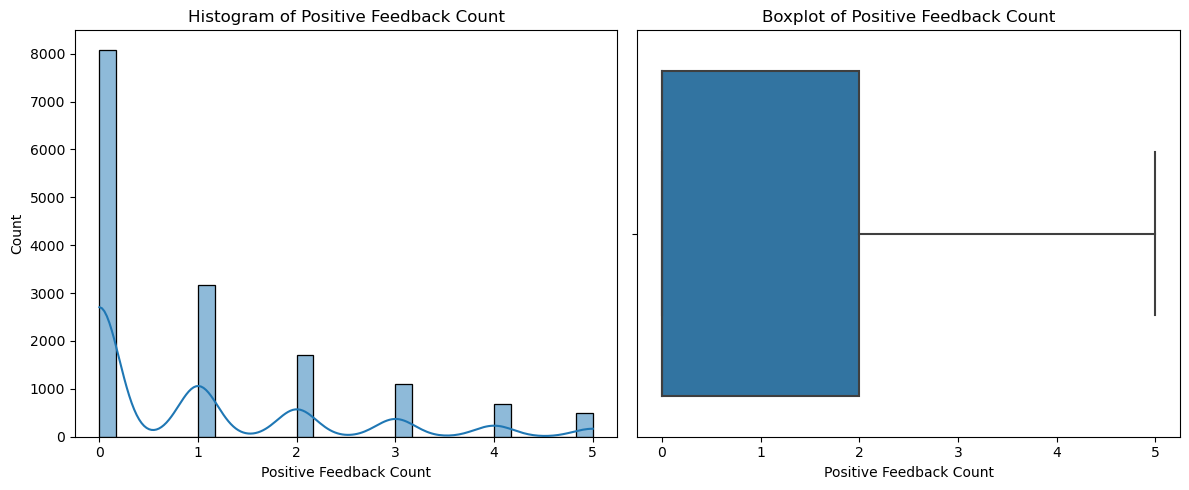

In [30]:
# --- Visualisasi Histogram dan Box Plot untuk kolom numerik ---
for col in numeric_cols:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df_clean[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_clean[col])
    plt.title(f"Boxplot of {col}")
    
    plt.tight_layout()
    plt.show()

In [31]:
# --- Perbandingan Data Sebelum dan Sesudah Cleaning ---
print("Summary statistik sebelum cleaning:")
print(df.describe())
print("\nSummary statistik setelah cleaning:")
print(df_clean.describe())

Summary statistik sebelum cleaning:
         Unnamed: 0   Clothing ID           Age        Rating  \
count  23472.000000  23472.000000  23471.000000  23471.000000   
mean   11738.965491    918.486665     43.201270      4.195560   
std     6779.729976    202.727678     12.280872      1.110211   
min        0.000000      0.000000     18.000000      1.000000   
25%     5867.750000    861.000000     34.000000      4.000000   
50%    11736.500000    936.000000     41.000000      5.000000   
75%    17610.250000   1078.000000     52.000000      5.000000   
max    23485.000000   1205.000000     99.000000      5.000000   

       Recommended IND  Positive Feedback Count  
count     23471.000000             23471.000000  
mean          0.822249                 2.537259  
std           0.382311                 5.703695  
min           0.000000                 0.000000  
25%           1.000000                 0.000000  
50%           1.000000                 1.000000  
75%           1.000000      

In [32]:
# --- Menyimpan Dataset yang Sudah Dibersihkan ---
cleaned_file = 'Womens Clothing E-Commerce Reviews-CLEANED.csv'
df_clean.to_csv(cleaned_file, index=False)
print(f"Dataset yang telah dibersihkan disimpan sebagai {cleaned_file}")


Dataset yang telah dibersihkan disimpan sebagai Womens Clothing E-Commerce Reviews-CLEANED.csv


In [33]:
# --- Menghitung Metrik ---
total_transactions = df_clean['Clothing ID'].count()
total_items = df_clean['Clothing ID'].nunique()
average_rating = df_clean['Rating'].mean()
total_positive_feedback = df_clean['Positive Feedback Count'].sum()

print("Total Transactions:", total_transactions)
print("Total Items (distinct Clothing ID):", total_items)
print("Average Rating:", round(average_rating, 2))
print("Total Positive Feedback:", total_positive_feedback)

Total Transactions: 15254
Total Items (distinct Clothing ID): 1024
Average Rating: 4.48
Total Positive Feedback: 15156.0


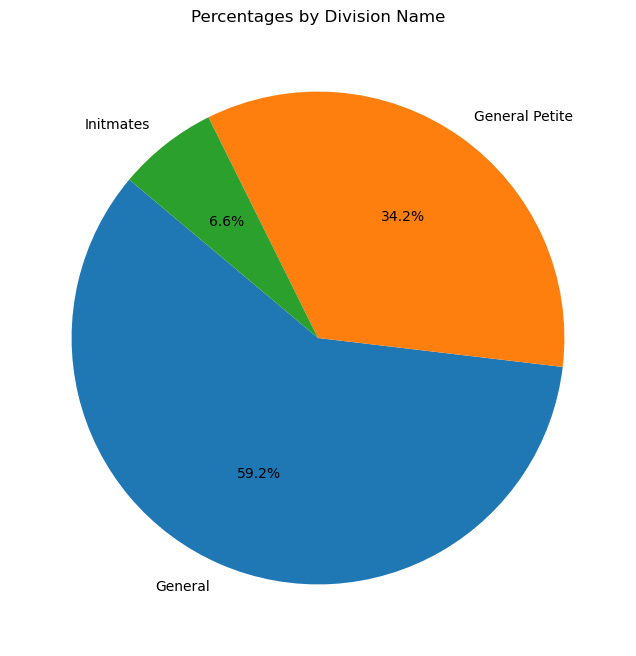

In [34]:
# --- Pie Chart: Percentages by Division Name ---
plt.figure(figsize=(8,8))
division_counts = df_clean['Division Name'].value_counts()
plt.pie(division_counts, labels=division_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Percentages by Division Name")
plt.show()

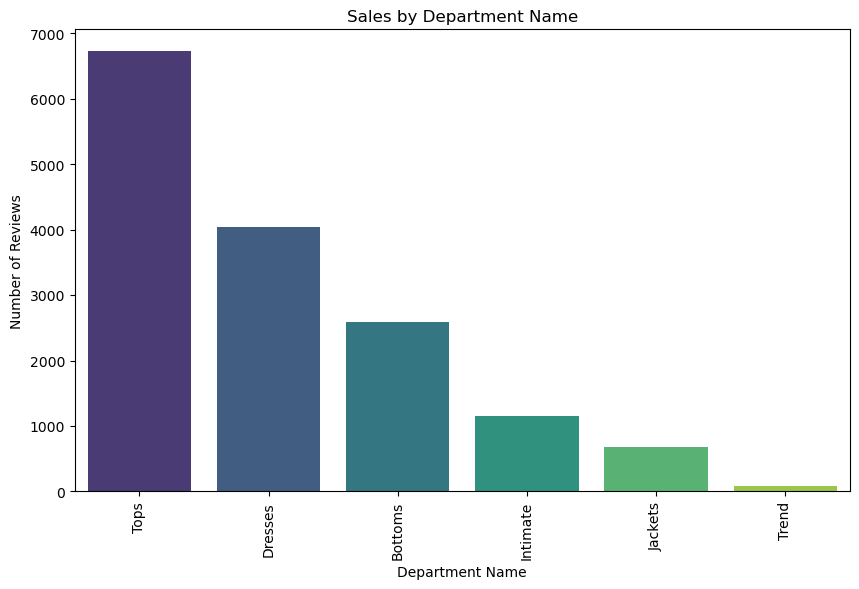

In [35]:
# --- Bar Chart: Sales by Department Name ---
plt.figure(figsize=(10,6))
department_counts = df_clean['Department Name'].value_counts()
sns.barplot(x=department_counts.index, y=department_counts.values, palette='viridis')
plt.title("Sales by Department Name")
plt.xlabel("Department Name")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=90)
plt.show()

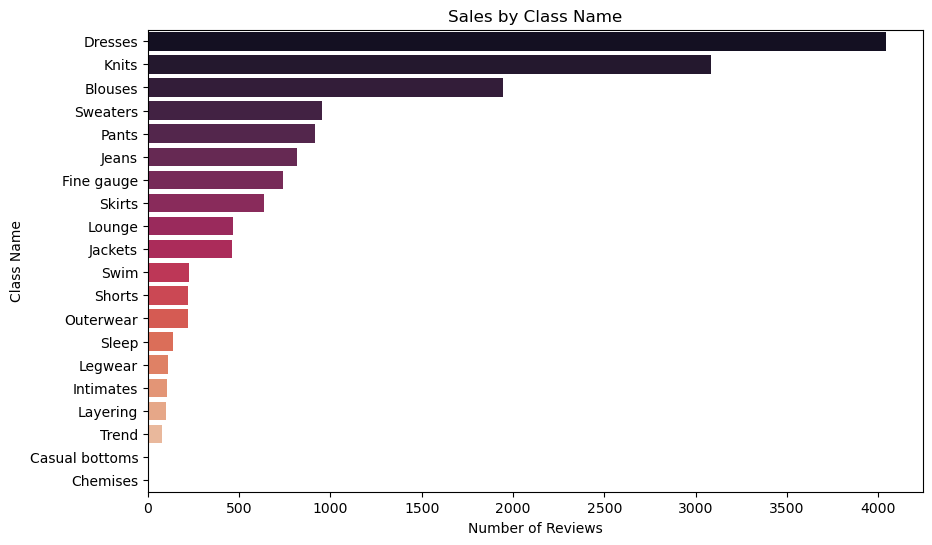

In [36]:
# --- Horizontal Bar Chart: Sales by Class Name ---
plt.figure(figsize=(10,6))
class_counts = df_clean['Class Name'].value_counts()
sns.barplot(x=class_counts.values, y=class_counts.index, palette='rocket')
plt.title("Sales by Class Name")
plt.xlabel("Number of Reviews")
plt.ylabel("Class Name")
plt.show()

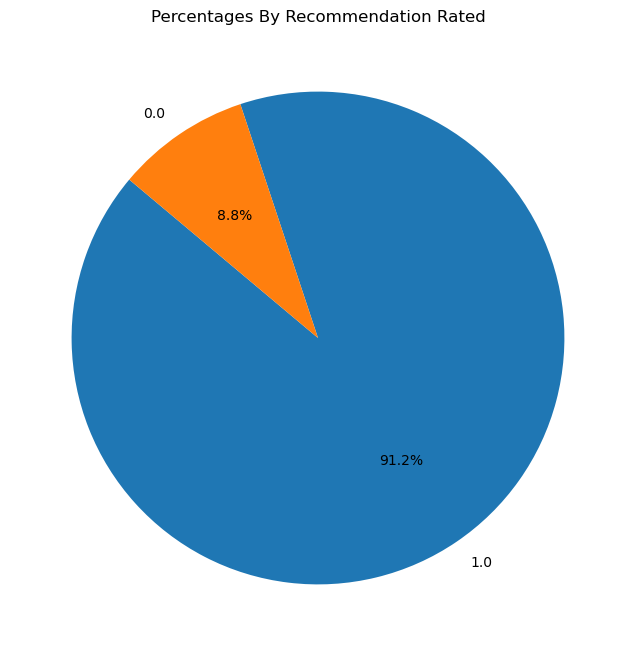

In [37]:
# --- Pie Chart: Percentages by Recommendation (Recommended IND) ---
plt.figure(figsize=(8,8))
recommend_counts = df_clean['Recommended IND'].value_counts()
plt.pie(recommend_counts, labels=recommend_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Percentages By Recommendation Rated")
plt.show()

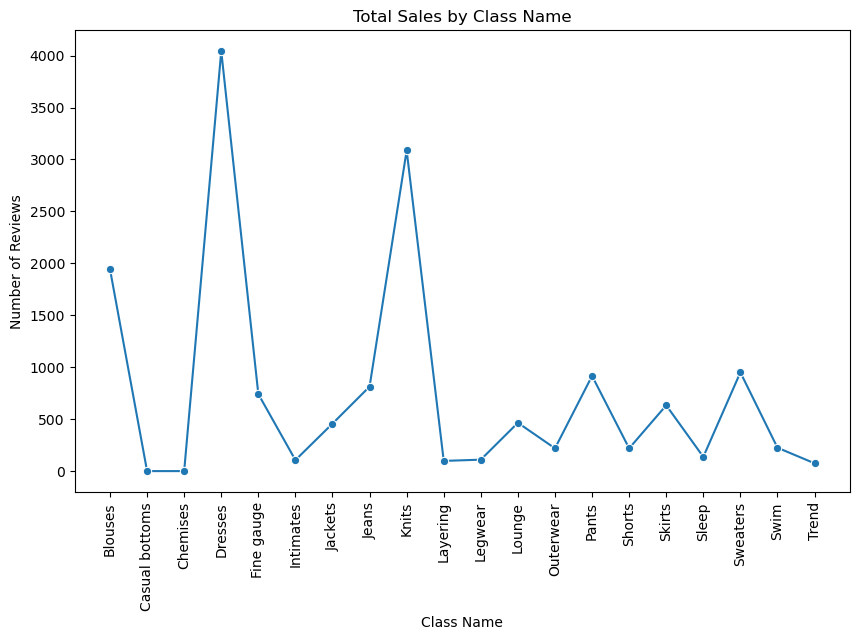

In [38]:
# --- Line Chart: Total Sales by Class Name ---
# Di sini kita anggap jumlah review per Class Name sebagai proxy untuk "sales"
sales_by_class = df_clean.groupby('Class Name')['Clothing ID'].count().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=sales_by_class, x='Class Name', y='Clothing ID', marker='o')
plt.title("Total Sales by Class Name")
plt.xlabel("Class Name")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=90)
plt.show()


In [39]:
# from dash import Dash, html, dcc
# import plotly.express as px

# # Inisialisasi aplikasi Dash
# app = Dash(__name__)

# # Buat figure menggunakan Plotly Express
# fig_division = px.pie(df_clean, names='Division Name', title='Percentages by Division Name')
# fig_department = px.bar(df_clean['Department Name'].value_counts().reset_index(),
#                           x='index', y='Department Name',
#                           title='Sales by Department Name',
#                           labels={'index': 'Department Name', 'Department Name': 'Number of Reviews'})
# fig_class = px.bar(df_clean['Class Name'].value_counts().reset_index(),
#                    x='index', y='Class Name',
#                    title='Sales by Class Name',
#                    labels={'index': 'Class Name', 'Class Name': 'Number of Reviews'})
# fig_recommend = px.pie(df_clean, names='Recommended IND', title='Percentages By Recommendation Rated')
# sales_by_class_line = df_clean.groupby('Class Name')['Clothing ID'].count().reset_index()
# fig_sales_line = px.line(sales_by_class_line, x='Class Name', y='Clothing ID', 
#                          title='Total Sales by Class Name')

# # Layout Dashboard
# app.layout = html.Div(children=[
#     html.H1("Dashboard Data E-Commerce Womens Clothing"),
    
#     html.Div([
#         html.H2("Metrik Utama"),
#         html.P(f"Total Transactions: {total_transactions}"),
#         html.P(f"Total Items (Distinct Clothing ID): {total_items}"),
#         html.P(f"Average Rating: {average_rating:.2f}"),
#         html.P(f"Total Positive Feedback: {total_positive_feedback}")
#     ], style={'padding': '20px', 'border': '1px solid #ccc'}),
    
#     dcc.Graph(figure=fig_division),
#     dcc.Graph(figure=fig_department),
#     dcc.Graph(figure=fig_class),
#     dcc.Graph(figure=fig_recommend),
#     dcc.Graph(figure=fig_sales_line)
# ])

# if __name__ == '__main__':
#     app.run_server(debug=True)
